In [3]:
import pathlib
import textwrap
import google.generativeai as genai
from IPython.display import display
from IPython.display import Markdown
import PIL.Image
import google.ai.generativelanguage as glm

In [4]:
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [7]:
genai.configure(api_key=GOOGLE_API_KEY)

In [9]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-pro-exp-0801
models/gemini-1.5-pro-exp-0827
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-exp-0827
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/gemini-exp-1114


In [15]:
model = genai.GenerativeModel('gemini-1.5-flash-latest')

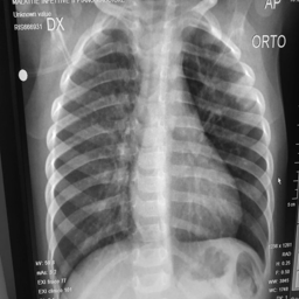

In [17]:
img = PIL.Image.open('C:\\Users\\LENOVO\\Downloads\\COVID-X-RAY.png')
img

In [19]:
response = model.generate_content([img, "describe"])
to_markdown(response.text)

> That's a frontal chest X-ray (also called a posteroanterior or PA chest X-ray).  It shows the lungs, heart, and ribs.  The image is labeled "ORTO," indicating an orthostatic (upright) position during the imaging.
> 
> **Without more context or information from a medical professional, I cannot interpret the image or offer any diagnosis.**  The appearance of the lungs and heart alone is not enough to determine any medical condition. There may be subtle findings that require the expertise of a radiologist or physician to analyze.
> 
> **To get an accurate interpretation, you must consult a doctor or radiologist.**  They will be able to analyze the image in conjunction with the patient's medical history and symptoms to make a proper assessment.  Sharing the image with them directly is the only way to obtain a reliable diagnosis.


1. Zero-Shot Prompting

In zero-shot prompting with image input, we provide the image and directly ask the model a question without any examples.

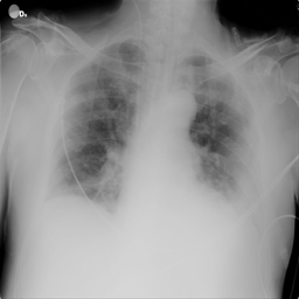

In [120]:
img = PIL.Image.open('C:\\Users\\LENOVO\\Downloads\\Prompt_Engineering\\Zero-Shot Prompting.png')
img

In [21]:
prompt = "I’m feeling short of breath and I have a fever. Can you examine my chest X-ray and tell me if it’s indicative of COVID-19 ?"
response = model.generate_content([img, prompt])
print(response.text)

I cannot interpret medical images or provide diagnoses.  I am an AI and do not have the medical training to analyze a chest X-ray.  The image you provided shows a radiographic projection of the chest, but determining if it indicates COVID-19 or any other condition requires the expertise of a qualified medical professional (like a doctor or radiologist).

**If you are experiencing shortness of breath and a fever, you should seek immediate medical attention.**  These symptoms could indicate a variety of serious conditions, and a prompt diagnosis and treatment are crucial.  Do not rely on an AI interpretation of a medical image for your health.  Go to a doctor or urgent care clinic right away.



2. One-Shot Prompting
   
In one-shot prompting, you provide one example to guide the model’s response. This can help with interpreting visual scenes.

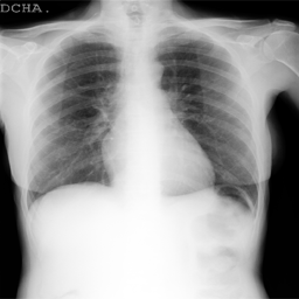

In [122]:
img = PIL.Image.open('C:\\Users\\LENOVO\\Downloads\\Prompt_Engineering\\One-Shot Prompting.png')
img

In [23]:
prompt = (
    "Example:\n"
    "Patient symptoms: cough and fever\n"
    "X-ray analysis: COVID-19 detected\n\n"
    "Now:\n"
    "Patient symptoms: fatigue and difficulty breathing\n"
    "Examine the chest X-ray:"
)
response = model.generate_content([img, prompt])
print(response.text)

The provided chest X-ray is of poor quality and resolution.  It's difficult to make a definitive diagnosis from this image alone.  However, based on the reported symptoms of fatigue and difficulty breathing, several possibilities need to be considered.  The X-ray shows:

* **Possible increased lung markings:** There's a suggestion of increased opacity or haziness in some lung fields, but this is not clearly defined due to image quality.  This could be consistent with several conditions, including:
    * **Pneumonia:**  Various types of pneumonia (bacterial, viral, or fungal) can cause increased lung markings and symptoms of fatigue and shortness of breath.
    * **Pulmonary edema:** Fluid buildup in the lungs can also lead to increased opacity and respiratory distress.  This needs to be ruled out.
    * **Interstitial lung disease:** A group of diseases affecting the lung tissue. This is less likely given the lack of distinct pattern.
    * **COVID-19:** While less likely based on this

3. Few-Shot Prompting

Few-shot prompting involves using multiple examples to establish a pattern.

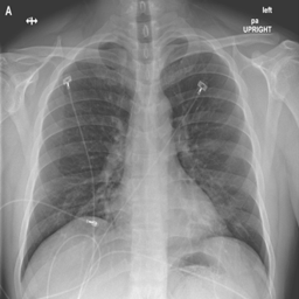

In [127]:
img = PIL.Image.open('C:\\Users\\LENOVO\\Downloads\\Prompt_Engineering\\Few-Shot Prompting.png')
img

In [25]:
prompt = (
    "Examples:\n"
    "1. Symptoms: cough, fever, shortness of breath\n"
    "   X-ray result: COVID-19 detected\n"
    "2. Symptoms: fatigue, chest pain\n"
    "   X-ray result: No COVID-19\n\n"
    "Now:\n"
    "Symptoms: sore throat, fever, and shortness of breath\n"
    "Examine this chest X-ray image:"
)
response = model.generate_content([img, prompt])
print(response.text)

The provided chest X-ray shows no definitive findings suggestive of COVID-19 pneumonia.  The image appears relatively normal, with no significant opacities, consolidations, or other abnormalities typically associated with COVID-19.  However,  a normal chest X-ray does *not* rule out COVID-19 infection.  Early in the disease process, or in mild cases, the X-ray may appear normal even though the person is infected.

**Therefore, based solely on this X-ray, I cannot confirm or deny the presence of COVID-19.**  The patient's symptoms (sore throat, fever, and shortness of breath) warrant further investigation with a more sensitive diagnostic test, such as a PCR or antigen test for COVID-19.  The X-ray result should not be used in isolation to make a diagnosis.



4. Chain of Thought (CoT) Prompting
   
In CoT prompting, the model walks through logical steps to arrive at a conclusion.

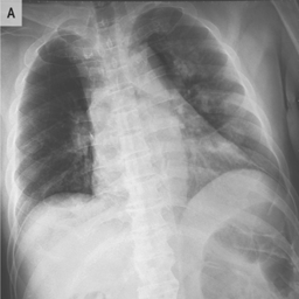

In [132]:
img = PIL.Image.open('C:\\Users\\LENOVO\\Downloads\\Prompt_Engineering\\Chain of Thought.png')
img

In [31]:
prompt = (
    "Patient: I have a fever and cough. Please examine my chest X-ray for COVID-19.\n\n"
    "Step-by-step Examine:"
)

response = model.generate_content([img, prompt])
print(response.text)

I cannot provide a diagnosis based on this chest x-ray.  I am an AI and not a medical professional.  Interpreting medical images requires the expertise of a trained radiologist or physician who can consider the image in context with the patient's clinical presentation (symptoms, medical history, etc.).

However, I can offer some observations about the image *for educational purposes only*.  These observations are not a diagnosis and should not be used for self-diagnosis or treatment.  **You must see a doctor for a proper diagnosis and treatment.**

**Observations (Not a Diagnosis):**

This appears to be an anterior-posterior (AP) chest x-ray.  At first glance, there are no grossly obvious findings suggestive of severe COVID-19 pneumonia.  Severe COVID-19 pneumonia is often characterized by extensive bilateral ground-glass opacities or consolidations.  This image does not show that pattern.

However, the image quality is not ideal.  The exposure may be slightly suboptimal, making it har

5. Instruction-Based Prompting
   
This approach gives explicit instructions on how to analyze the image.

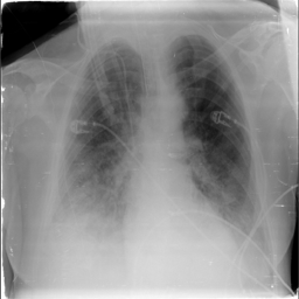

In [136]:
img = PIL.Image.open('C:\\Users\\LENOVO\\Downloads\\Prompt_Engineering\\Instruction-Based Prompting.png')
img

In [37]:
prompt = (
    "Instructions:\n"
    "1. Examine the patient's chest X-ray.\n"
    "2. Identify signs of COVID-19.\n"
    "3. Explain your findings.\n\n"
    "Symptoms: fever and shortness of breath"
)

response = model.generate_content([img, prompt])
print(response.text)

I am an AI and cannot provide medical diagnoses.  I cannot interpret medical images like chest X-rays.  Only a qualified radiologist or physician can accurately assess a chest X-ray and determine if it shows signs of COVID-19 or any other condition.  The image provided is not sufficient for a diagnosis.

While some COVID-19 cases may show characteristic findings on chest X-rays (like ground-glass opacities or consolidations), these findings are not specific to COVID-19 and can be seen in many other lung conditions.  Furthermore, the absence of these findings does *not* rule out COVID-19.  A negative chest X-ray does not guarantee the absence of the disease.

**If a patient presents with fever and shortness of breath**,  it is crucial to seek immediate medical attention.  A physician will take a complete history, perform a physical exam, and may order additional tests (such as a PCR or antigen test for COVID-19 or other blood work) to reach an accurate diagnosis and determine the approp

6. Role-Playing
   
Role-playing can guide the model to answer from a particular perspective.

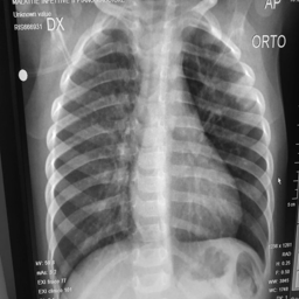

In [143]:
img = PIL.Image.open('C:\\Users\\LENOVO\\Downloads\\Prompt_Engineering\\Role-Playing.png')
img

In [33]:
prompt = (
    "You are a radiologist. Based on the patient's X-ray and symptoms of fatigue and chest pain, provide your observations."
)

response = model.generate_content([img, prompt])
print(response.text)

The provided chest X-ray shows findings consistent with findings suggestive of **possible pneumonia**, but further investigation is absolutely necessary.  It's crucial to remember that I am an AI and cannot provide a diagnosis.  This interpretation is for informational purposes only and should not be used in place of a consultation with a qualified medical professional.

**Observations:**

* **Increased Opacity:** There are areas of increased opacity (whiteness) in the lung fields, particularly apparent in the lower lobes bilaterally. This is suggestive of consolidation, a hallmark of pneumonia, but could also be caused by other conditions like atelectasis (collapsed lung), pulmonary edema, or a tumor. The distribution is not entirely typical for classic lobar pneumonia, but that doesn't rule it out.  The pattern is somewhat patchy.

* **No obvious pleural effusion:** I don't see a significant pleural effusion (fluid buildup around the lungs) on this image.

* **Cardiomediastinal silho

7. Prompt Priming
   
Prompt priming sets the model up to answer in a specific tone or style.

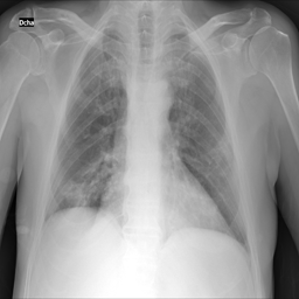

In [172]:
img = PIL.Image.open('C:\\Users\\LENOVO\\Downloads\\Prompt_Engineering\\Prompt Priming.png')
img

In [35]:
prompt = (
    "Background: COVID-19 frequently presents as patchy ground-glass opacities in chest X-rays.\n"
    "Symptoms: cough and fever\n"
    "Analyze the chest X-ray and determine if there are signs of COVID-19:"
)

response = model.generate_content([img, prompt])
print(response.text)

That chest X-ray shows no clear signs of COVID-19 pneumonia.

While COVID-19 can present with ground-glass opacities,  this image doesn't demonstrate them.  The lungs appear relatively clear.  There are no significant consolidations, infiltrates, or other abnormalities typically associated with severe COVID-19 pneumonia.

**Important Disclaimer:**  I am an AI and cannot diagnose medical conditions. This analysis is based solely on the provided image and limited information.  A cough and fever are not specific to COVID-19 and can be caused by many other illnesses.  A proper diagnosis requires a thorough clinical evaluation by a medical professional, including considering the patient's medical history, physical examination findings, and possibly further investigations such as PCR testing or other imaging studies (e.g., CT scan).  **Do not rely on this AI analysis for medical decision-making.**  See a doctor for proper evaluation and treatment.



8. Task Decomposition
   
Task decomposition breaks down a prompt into smaller tasks.

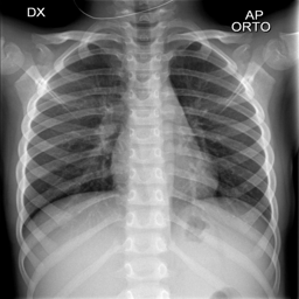

In [182]:
img = PIL.Image.open('C:\\Users\\LENOVO\\Downloads\\Prompt_Engineering\\Task Decomposition.png')
img

In [39]:
prompt = (
    "Task:\n"
    "1. Describe abnormalities in the chest X-ray.\n"
    "2. Determine if these are consistent with COVID-19.\n\n"
    "Symptoms: shortness of breath and fever"
)

response = model.generate_content([img, prompt])
print(response.text)

The chest X-ray shows:

1. **Increased interstitial markings:** There's an increase in the hazy, fine lines throughout both lungs, particularly in the perihilar regions (around the hilum of the lungs where the bronchi and blood vessels enter and exit).  This suggests interstitial lung disease. The pattern isn't uniform, and isn't the typical "ground-glass opacity" often seen with COVID-19 pneumonia, although some areas might be interpreted that way depending on the viewer's experience and the image quality.

2. **No consolidation:** There are no large areas of white opacification (consolidation) that would suggest pneumonia filling the air spaces. This is important in differentiating from typical bacterial or viral pneumonias.


**Regarding COVID-19 Consistency:**

The findings are **not definitively consistent** with COVID-19 pneumonia. While increased interstitial markings can be seen in COVID-19, the absence of significant consolidation makes it less likely to be the primary diagnos

9. Few-Shot Chain of Thought

This combines few-shot prompting with chain of thought to demonstrate step-by-step reasoning.

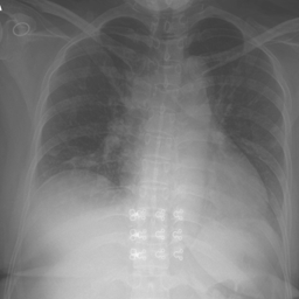

In [168]:
img = PIL.Image.open('C:\\Users\\LENOVO\\Downloads\\Prompt_Engineering\\Few-Shot Chain of Thought.png')
img

In [41]:
prompt = (
    "Examples:\n"
    "1. Symptoms: cough and fever\n"
    "   X-ray analysis: Ground-glass opacities observed -> Consistent with COVID-19\n\n"
    "2. Symptoms: fatigue, chest pain\n"
    "   X-ray analysis: No abnormalities -> Not consistent with COVID-19\n\n"
    "Now:\n"
    "Symptoms: shortness of breath, fever\n"
    "Analyze the X-ray:"
)

response = model.generate_content([img, prompt])
print(response.text)

That's a chest X-ray.  Based solely on the image provided, there are no readily apparent abnormalities such as pneumonia, pleural effusion, or significant lung infiltrates that would be obviously consistent with COVID-19 or other acute respiratory illnesses. The lungs appear relatively clear.  However, a normal chest X-ray does *not* rule out COVID-19.

**Important Disclaimer:**  I am an AI and cannot interpret medical images.  This analysis is purely observational and should **not** be used for diagnostic purposes.  A qualified radiologist or physician needs to review the X-ray in conjunction with the patient's medical history and other clinical findings (blood tests, etc.) to make a proper diagnosis.  The shortness of breath and fever necessitate a proper medical evaluation.



10. Contrastive Prompting

Contrastive prompting helps differentiate similar concepts.

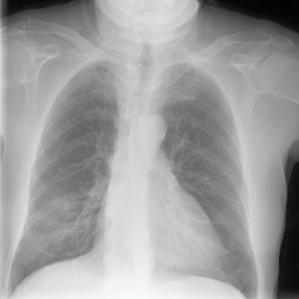

In [166]:
img = PIL.Image.open('C:\\Users\\LENOVO\\Downloads\\Prompt_Engineering\\Contrastive Prompting.png')
img

In [43]:
prompt = (
    "Case 1: Symptoms of fatigue, fever, and cough. X-ray shows patchy ground-glass opacities.\n"
    "Case 2: Symptoms of fatigue and chest pain. X-ray is normal.\n\n"
    "Which case is more likely to be COVID-19? Explain your reasoning."
)

response = model.generate_content([img, prompt])
print(response.text)

Case 1 is far more likely to be COVID-19 than Case 2.  Here's why:

* **Case 1:** The presence of patchy ground-glass opacities on the chest X-ray is a classic radiological finding associated with COVID-19 pneumonia.  These opacities represent areas of inflammation and fluid buildup in the lungs.  The symptoms of fatigue, fever, and cough also align with common COVID-19 presentations.

* **Case 2:** A normal chest X-ray makes COVID-19 significantly less likely. While COVID-19 can sometimes present with minimal or no radiological changes, especially in early stages or mild cases, the absence of any abnormalities makes other diagnoses much more probable. Fatigue and chest pain can have many causes, and a normal X-ray rules out many lung-related conditions.  The symptoms could point to musculoskeletal issues, cardiac problems, or other non-pulmonary causes.

**Important Note:** A chest X-ray is not a definitive diagnostic tool for COVID-19.  A positive diagnosis requires further testing, 

11. Error Identification

This technique asks the model to identify mistakes in the prompt or the description related to the image.

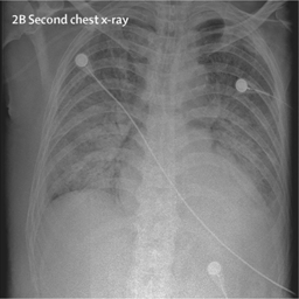

In [164]:
img = PIL.Image.open('C:\\Users\\LENOVO\\Downloads\\Prompt_Engineering\\Error Identification.png')
img

In [45]:
prompt = (
    "Analysis: The patient has a fever and cough. The X-ray shows patchy ground-glass opacities, but the conclusion states 'No COVID-19.'\n"
    "Identify any errors:"
)

response = model.generate_content([img, prompt])
print(response.text)

That's a chest X-ray showing findings consistent with some type of pneumonia or lung inflammation.  Several errors are possible in the provided information and conclusion:

* **Patchy ground-glass opacities are non-specific:**  Ground-glass opacities on a chest X-ray are not diagnostic of any single condition, including COVID-19.  Many respiratory illnesses, including viral, bacterial, and fungal infections, as well as other conditions, can cause similar findings.

* **Negative X-ray does not rule out COVID-19:** The absence of findings *suggestive* of COVID-19 on a chest X-ray does not definitively rule it out. COVID-19 can present with atypical chest X-ray findings or even be completely normal in the early stages.  The most accurate way to diagnose COVID-19 is with a molecular test (PCR or antigen).

* **Missing Clinical Context:**  The chest X-ray image alone is insufficient for a diagnosis. A proper assessment requires clinical information, such as the patient's history (symptoms, 

12. Self-Correction Prompting
    
This prompting style asks the model to validate its own answer.

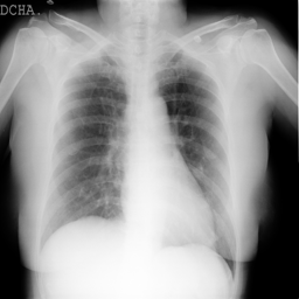

In [162]:
img = PIL.Image.open('C:\\Users\\LENOVO\\Downloads\\Prompt_Engineering\\Self-Correction Prompting.png')
img

In [47]:
prompt = (
    "Initial conclusion: 'The X-ray is normal.'\n"
    "Symptoms: fever and shortness of breath\n"
    "Revisit the analysis and correct any errors:"
)

response = model.generate_content([img, prompt])
print(response.text)

The initial conclusion "The X-ray is normal" is incorrect given the presenting symptoms of fever and shortness of breath.  While the X-ray may *appear* normal at first glance to an untrained eye,  the presence of fever and shortness of breath necessitates a more thorough and nuanced interpretation.  A normal chest X-ray does *not* rule out pneumonia, bronchiolitis, or other lung infections that could cause these symptoms.

**Reasons why a "normal" X-ray might be misleading:**

* **Early-stage infection:**  Infections may not show up clearly on X-ray in the very early stages.  The changes in lung tissue density might be subtle and not yet detectable radiographically.
* **Interstitial disease:** Some lung diseases (like viral infections) primarily affect the interstitial spaces (the tissue between the alveoli). These may not produce obvious opacities on a chest X-ray.
* **Technical factors:**  The quality of the X-ray image itself might limit the ability to identify subtle abnormalities.

13. Explain Your Answer

Here, the model explains its reasoning behind the description.

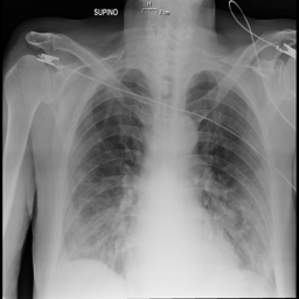

In [174]:
img = PIL.Image.open('C:\\Users\\LENOVO\\Downloads\\Prompt_Engineering\\Explain Your Answer.png')
img

In [49]:
prompt = (
    "Symptoms: fatigue and fever\n"
    "Does the X-ray indicate COVID-19? Provide your reasoning:"
)

response = model.generate_content([img, prompt])
print(response.text)

That chest X-ray does **not** show findings typical of COVID-19 pneumonia.

**Reasons:**

* **Lack of characteristic opacities:** COVID-19 pneumonia often presents with ground-glass opacities, sometimes with consolidations, typically in a peripheral and often bilateral distribution.  This X-ray shows a relatively clear lung field with no significant opacities or infiltrates.  The lungs appear relatively normal.

* **No specific pattern:** There's no distinct pattern suggesting a viral pneumonia.  While some viral pneumonias can show relatively normal X-rays early in the course of the illness, the absence of any concerning features makes COVID-19 unlikely.

**Important Note:**  A chest X-ray is not a definitive test for COVID-19.  The presence or absence of pneumonia on a chest X-ray does not rule in or rule out COVID-19 infection.  A negative chest X-ray in a patient with symptoms suggestive of COVID-19 should not lead to a delay in obtaining a COVID-19 test (such as a PCR or antigen t

14. Comparative Judgment

This technique asks the model to compare elements within or between images.

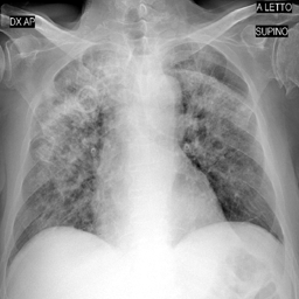

In [176]:
img = PIL.Image.open('C:\\Users\\LENOVO\\Downloads\\Prompt_Engineering\\Comparative Judgment.png')
img

In [51]:
prompt = (
    "Patient 1: Confirmed COVID-19, symptoms include cough and fever. X-ray shows ground-glass opacities.\n"
    "Patient 2: Symptoms include fatigue and shortness of breath. X-ray provided.\n\n"
    "Compare the two X-rays and describe similarities or differences:"
)

response = model.generate_content([img, prompt])
print(response.text)

That's not possible without the X-ray for Patient 2.  I need the image of Patient 2's chest X-ray to make a comparison.  I can only analyze images that are provided to me.

Once you provide the X-ray for Patient 2, I can compare it to Patient 1's X-ray, looking for similarities and differences in things like:

* **Ground-glass opacities:** Are they present in both?  Are they in the same locations and to the same extent?
* **Consolidation:**  Is there evidence of consolidation (whiter, denser areas) in either?
* **Air bronchograms:**  Are air bronchograms visible (airways appearing as dark lines against a hazy background)?
* **Pleural effusions:** Is there fluid buildup around the lungs?
* **Other abnormalities:** Are there other unusual findings in either X-ray?

Keep in mind that I am an AI and cannot diagnose medical conditions.  Any observations I make should be considered preliminary and require confirmation by a qualified medical professional.  A radiologist is the best person to 

15. Clarification Prompting

Clarification prompting is useful for ambiguous scenes, guiding the model to ask for more context if needed.

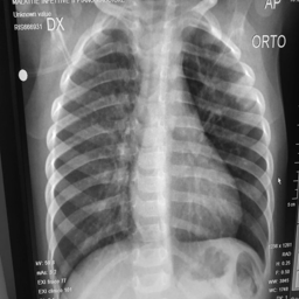

In [178]:
img = PIL.Image.open('C:\\Users\\LENOVO\\Downloads\\Prompt_Engineering\\Clarification Prompting.png')
img

In [53]:
prompt = (
    "Patient: I feel unwell. Can you examine my X-ray for Covid?\n"
    "If needed, ask clarifying questions before analyzing:"
)

response = model.generate_content([img, prompt])
print(response.text)

I cannot diagnose medical conditions, including COVID-19, based on an X-ray image.  I am an AI and do not have the medical expertise to interpret medical imaging.  A chest X-ray can show some findings suggestive of COVID-19 pneumonia (like ground-glass opacities), but it's not a definitive test.  Many other lung conditions can produce similar findings.

To determine if you have COVID-19, you need to consult a medical professional. They will consider your symptoms, medical history, and potentially order tests like a PCR or antigen test, which are much more reliable for diagnosing COVID-19 than a chest X-ray.


**Therefore, I strongly advise you to:**

* **Contact your doctor or a healthcare provider immediately.** Describe your symptoms and concerns.
* **Do not attempt self-diagnosis or self-treatment.**

Providing the X-ray image to your doctor will help them in their assessment, but it's just one piece of information amongst many required for a proper diagnosis.

